In [1]:
import json
from serpapi import GoogleSearch
import requests
import io
import numpy as np    
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
with open("config.json", "r") as f:
    config = json.load(f)
    
key = config['key']

In [8]:
def search_images(query="cat doodle minimal"):
    params = {
        "tbm": "isch",
        "q": query,
        "api_key": key,
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    return results

In [9]:
def download_image(url):
    bin_img = requests.get(url).content
    img = Image.open(io.BytesIO(bin_img))
    return np.asarray(img)

# Google Images Doodles

In [139]:
classes = ["airplane", "car", "bird", "cat", "dog", "frog", "horse", "ship", "truck"]
# terms = ["doodle", "sketch"]
# terms = ["drawing easy", "doodle single"]
terms = ["sketch simple"]

urls_dataset = {c + ' ' + t: [] for t in terms for c in classes}
for c in classes:
    for t in terms:
        query = c + ' ' + t
        results = search_images(query)
        urls = [r['thumbnail'] for r in results['images_results']]
        urls_dataset[query] += urls

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [15]:
with open('images.json', 'w') as f:
    json.dump(urls_dataset, f)
with open("images.json", "r") as f:
    urls_dataset = json.load(f)

In [121]:
with open('drawing_easy-doodle_single.json', 'w') as f:
    json.dump(urls_dataset, f)
with open("drawing_easy-doodle_single.json", "r") as f:
    urls_dataset = json.load(f)

In [140]:
with open('sketch_simple.json', 'w') as f:
    json.d
with open("sketch_simple.json", "r") as f:ump(urls_dataset, f)
    urls_dataset = json.load(f)

In [111]:
def flip_img(arr):
    return 255-arr

def preprocess_img(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    if (img < 255/2).sum() > 256*256/2:
        img = flip_img(img)
    return img

In [133]:
def collect_dataset(d):
    dataset = {c: [] for c in classes}
    for clas, urls in d.items():
        for url in urls:
            img = download_image(url)
            img = preprocess_img(img)
            c, _, _ = clas.split()
            dataset[c].append(img)
    dataset = {c: np.asarray(imgs) for c, imgs in dataset.items()}
    return dataset

In [142]:
dataset = collect_dataset(urls_dataset)

In [116]:
def plot_dataset(d):
    for clas, data in d.items():
        fig, ax = plt.subplots(1,10)
        fig.suptitle(f'{clas} - {data.shape}')
        plt.gcf().set_size_inches(20, 2)
        imgs = d[clas][np.random.choice(len(d[clas]), 10)]
        for i in range(10):
            ax[i].imshow(imgs[i], cmap='gray')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()

In [119]:
# np.save("doodle-sketch.npy", dataset)
# dataset = np.load('doodle-sketch.npy', allow_pickle=True)[()]

# np.save("drawing_easy-doodle_single.npy", dataset)
# dataset = np.load('drawing_easy-doodle_single.npy', allow_pickle=True)[()]

# np.save("sketch_simple.npy", dataset)
# dataset = np.load('sketch_simple.npy', allow_pickle=True)[()]

In [147]:
dataset1 = np.load('doodle-sketch.npy', allow_pickle=True)[()]
dataset2 = np.load('drawing_easy-doodle_single.npy', allow_pickle=True)[()]
dataset3 = np.load('sketch_simple.npy', allow_pickle=True)[()]
dataset = {}
for c in classes:
    data = np.concatenate([dataset1[c], dataset2[c], dataset3[c]], axis=0)
    dataset[c] = data

In [152]:
np.save("dataset/google_images.npy", dataset)
dataset = np.load('dataset/google_images.npy', allow_pickle=True)[()]

In [155]:
print("Image shape:", dataset['airplane'].shape[1:])
print("No. classes:", len(dataset.keys()))
print("Classes:", ', '.join(dataset.keys()))
print("Count per class:")
size = 0
for category, data in dataset.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 500
   car - 500
   bird - 500
   cat - 500
   dog - 500
   frog - 500
   horse - 500
   ship - 500
   truck - 500
Dataset size: 4500


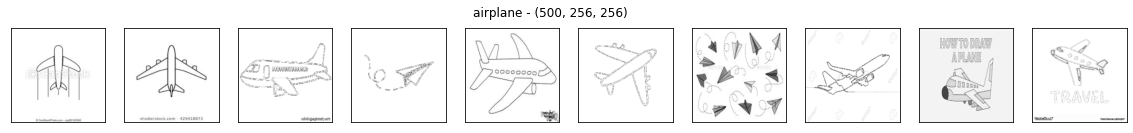

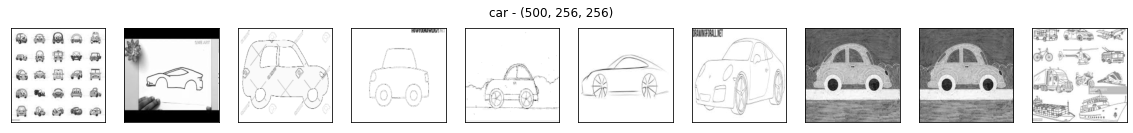

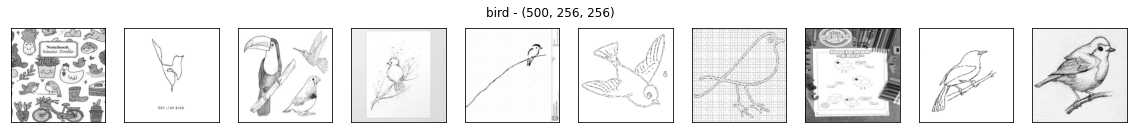

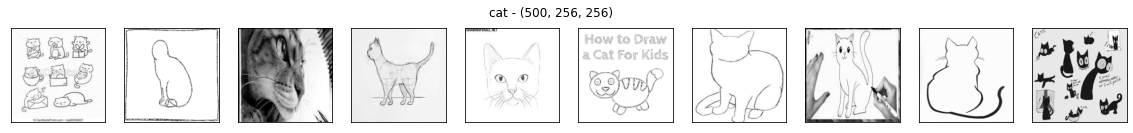

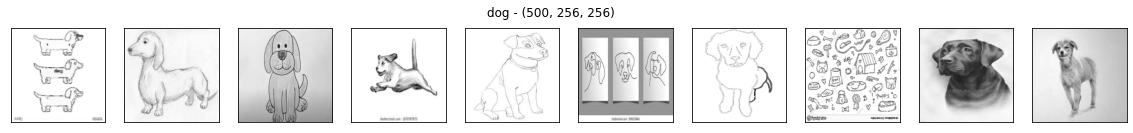

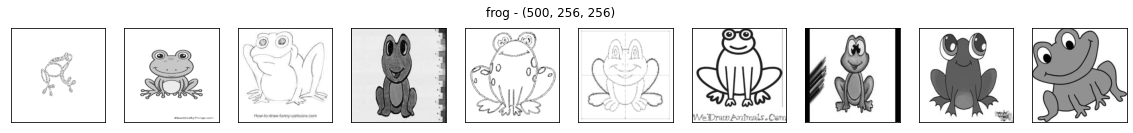

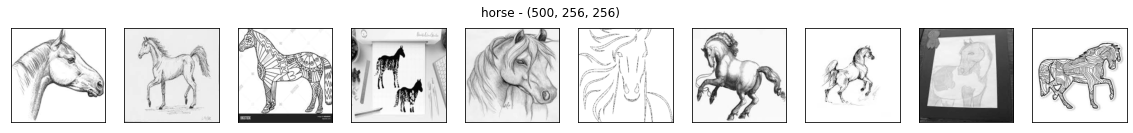

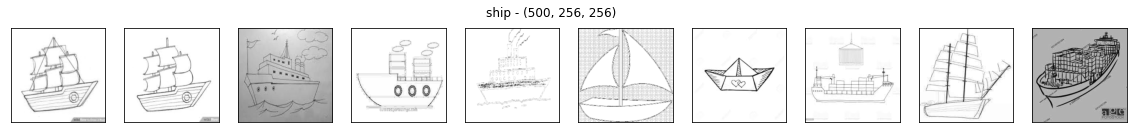

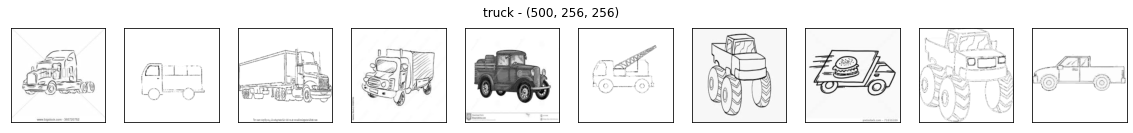

In [154]:
plot_dataset(dataset)

# Google Images Real

In [163]:
classes = ["airplane", "car", "bird", "cat", "dog", "frog", "horse", "ship", "truck"]

urls_dataset = {c: [] for c in classes}
for c in classes:
    results = search_images(c)
    urls = [r['thumbnail'] for r in results['images_results']]
    urls_dataset[c] += urls

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [165]:
with open('dataset/google_images/real.json', 'w') as f:
    json.dump(urls_dataset, f)
with open("dataset/google_images/real.json", "r") as f:
    urls_dataset = json.load(f)

In [183]:
def preprocess_img(img):
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    if (img < 255/2).sum() > 256*256/2:
        img = flip_img(img)
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

In [184]:
def collect_dataset(d):
    dataset = {c: [] for c in classes}
    for clas, urls in d.items():
        for url in urls:
            img = download_image(url)
            img = preprocess_img(img)
            dataset[clas].append(img)
    dataset = {c: np.asarray(imgs) for c, imgs in dataset.items()}
    return dataset

In [186]:
google_real = collect_dataset(urls_dataset)

In [211]:
print("Image shape:", google_real['airplane'].shape[1:])
print("No. classes:", len(google_real.keys()))
print("Classes:", ', '.join(google_real.keys()))
print("Count per class:")
size = 0
for category, data in google_real.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 100
   car - 100
   bird - 100
   cat - 100
   dog - 100
   frog - 100
   horse - 100
   ship - 100
   truck - 100
Dataset size: 900


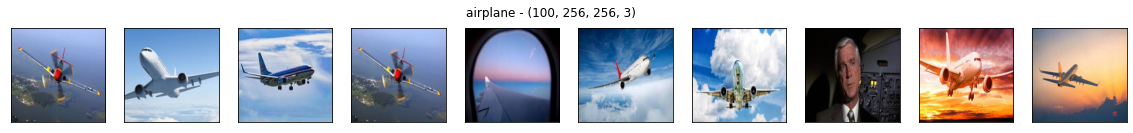

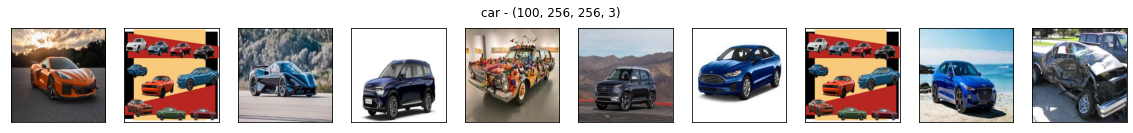

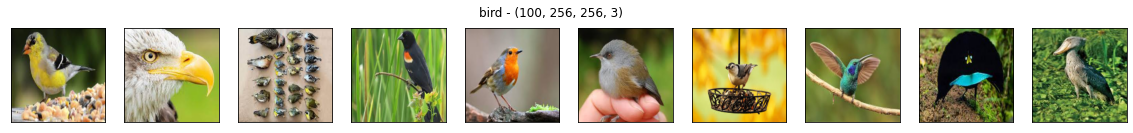

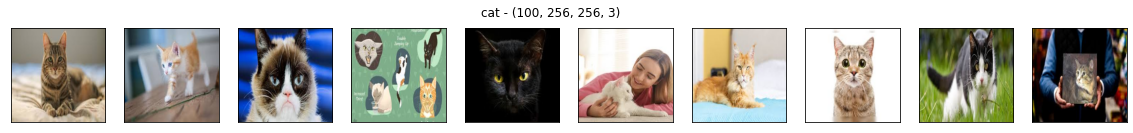

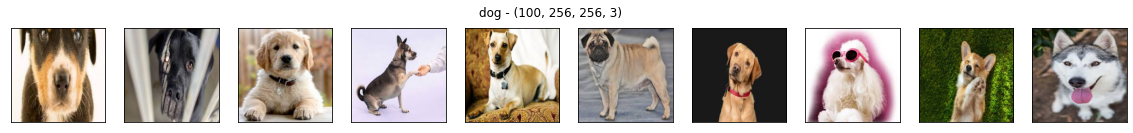

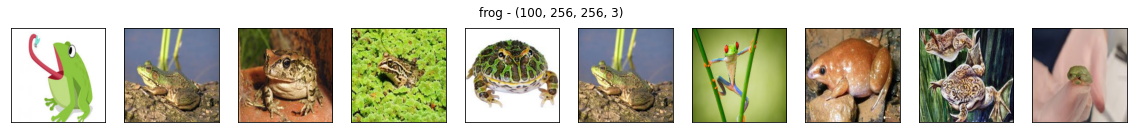

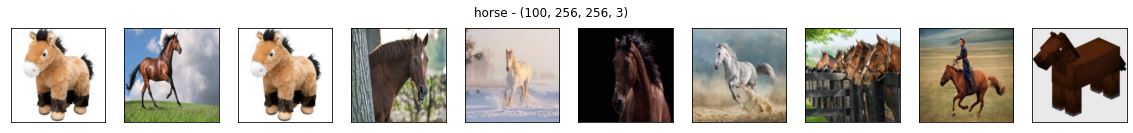

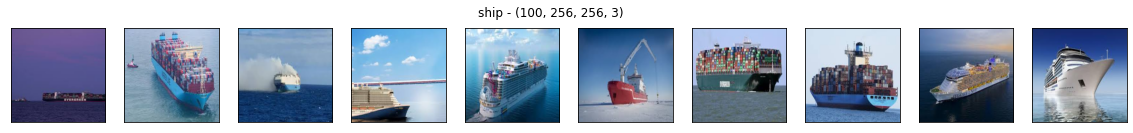

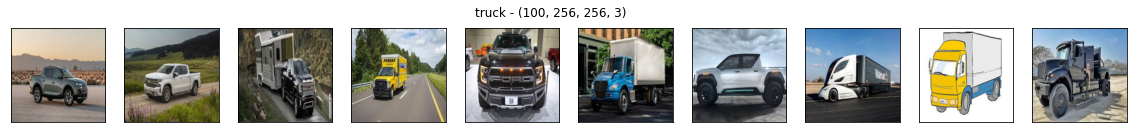

In [199]:
plot_dataset(google_real)

In [207]:
np.save("dataset/dataset.npy", dataset)

In [208]:
dataset = np.load('dataset/dataset.npy', allow_pickle=True)[()]
dataset.keys()

dict_keys(['cifar_train', 'cifar_test', 'quickdraw', 'sketchy_real', 'sketchy_doodle', 'tuberlin', 'google_doodle', 'google_real'])

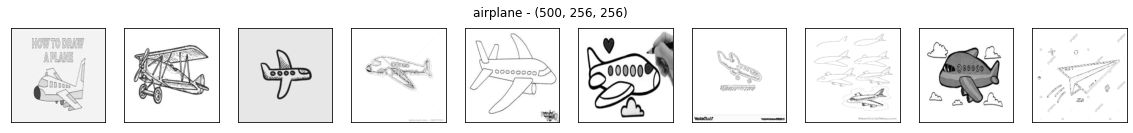

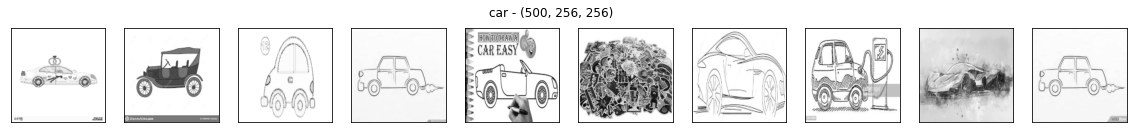

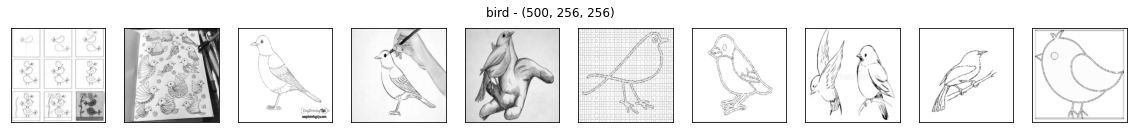

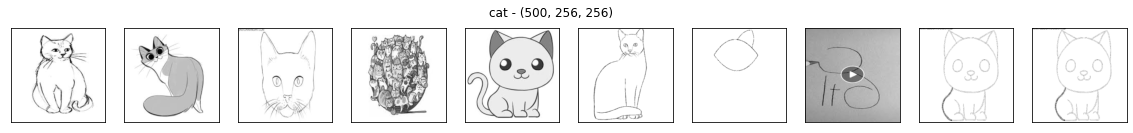

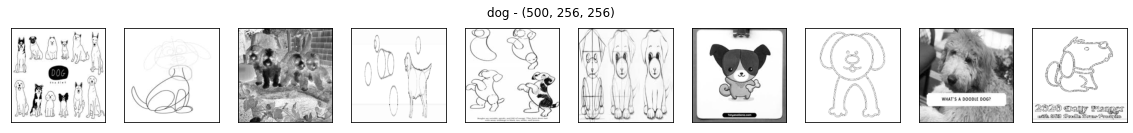

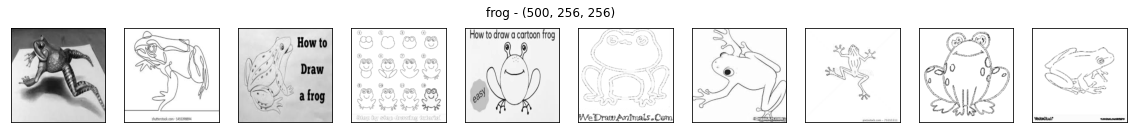

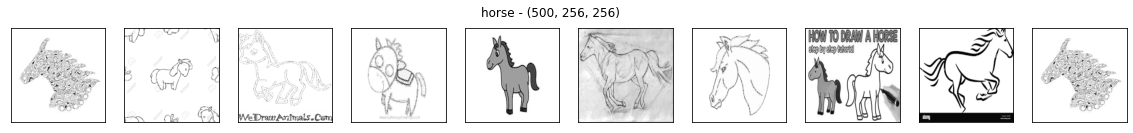

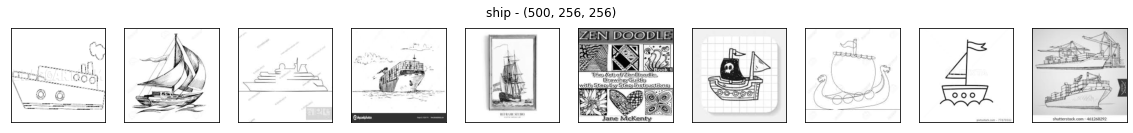

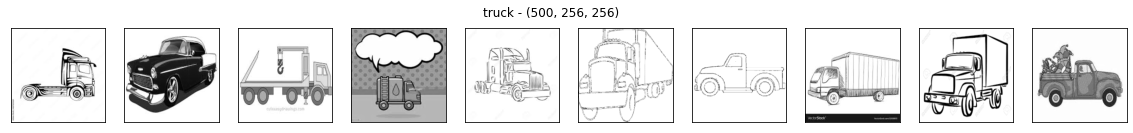

In [215]:
plot_dataset(dataset['google_doodle'])